In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("msafi04/predict-mortality-of-icu-patients-physionet")

print("Path to dataset files:", path)

100%|██████████| 7.64M/7.64M [00:00<00:00, 48.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/msafi04/predict-mortality-of-icu-patients-physionet/versions/1


Path to dataset files: /kaggle/input/predict-mortality-of-icu-patients-physionet

Loading /kaggle/input/predict-mortality-of-icu-patients-physionet/Outcomes-a.txt

=== BASIC DATASET INFORMATION ===
Shape of the dataset: (4000, 6)

First 5 rows of the dataset:
   RecordID  SAPS-I  SOFA  Length_of_stay  Survival  In-hospital_death
0    132539       6     1               5        -1                  0
1    132540      16     8               8        -1                  0
2    132541      21    11              19        -1                  0
3    132543       7     1               9       575                  0
4    132545      17     2               4       918                  0

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   RecordID           4000 non-null   int64
 1   SAPS-I             4000 non-null   int64
 2   SOFA

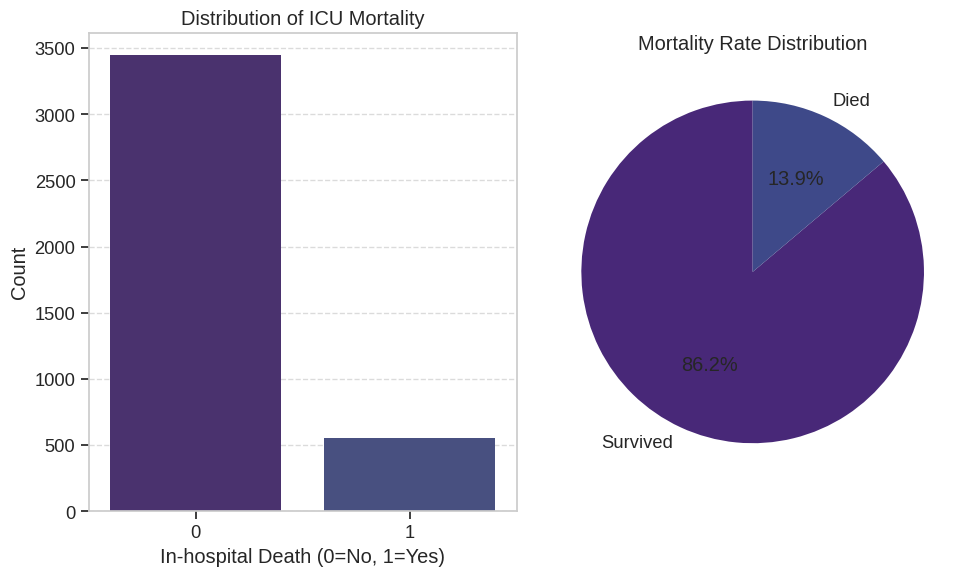


=== ENHANCED FEATURE ANALYSIS ===
Features for modeling: ['SAPS-I', 'SOFA', 'Length_of_stay', 'Survival']

Statistical Significance Test Results:
  SAPS-I: p-value = 0.0000 (Significant)
  SOFA: p-value = 0.0000 (Significant)
  Length_of_stay: p-value = 0.7184 (Not Significant)
  Survival: p-value = 0.0000 (Significant)

=== IMPROVED OUTLIER DETECTION AND HANDLING ===
Outlier Detection Summary:
  SAPS-I: 202 outliers (5.05%)
  SOFA: 11 outliers (0.27%)
  Length_of_stay: 238 outliers (5.95%)
  Survival: 823 outliers (20.57%)

=== CORRELATION ANALYSIS ===


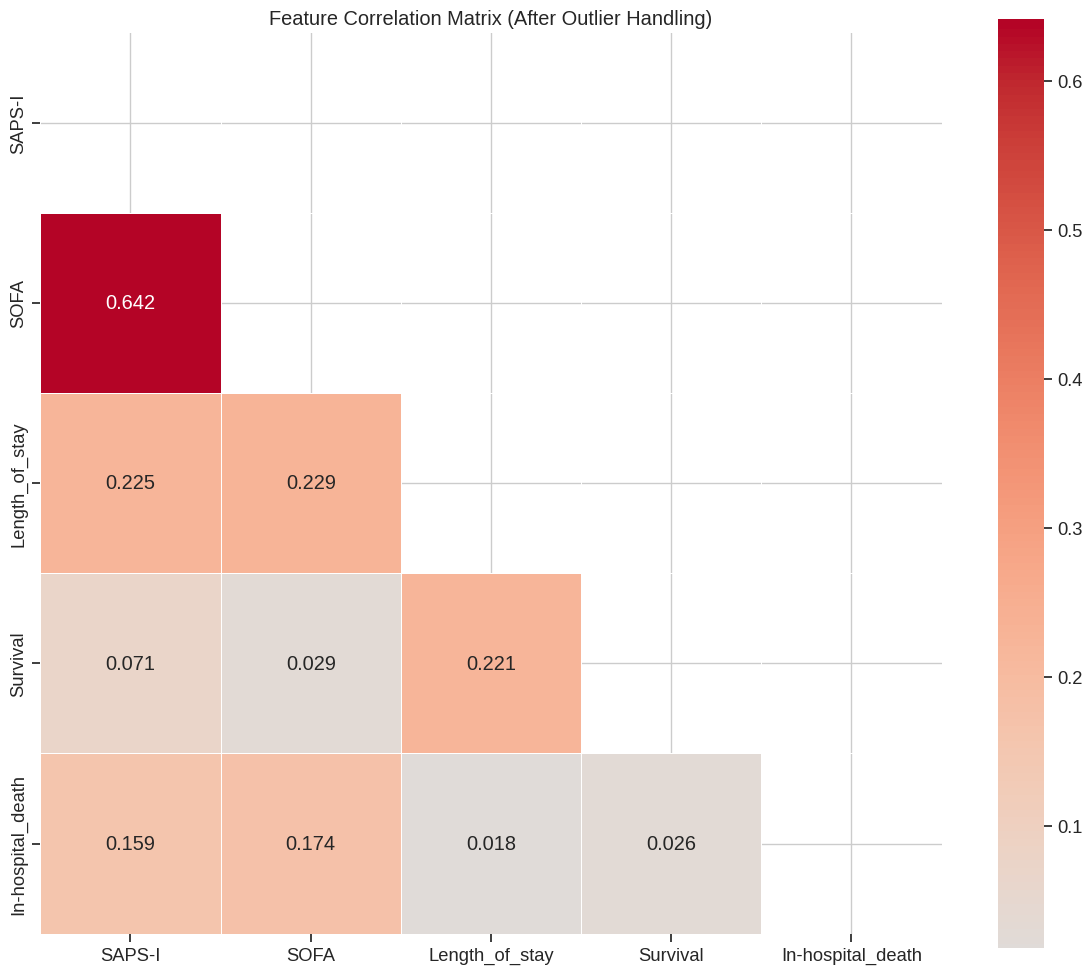


Feature correlations with mortality (absolute value):
  SOFA: 0.1742
  SAPS-I: 0.1589
  Survival: 0.0259
  Length_of_stay: 0.0182

=== DATA PREPARATION FOR MACHINE LEARNING ===
Feature matrix shape: (4000, 4)
Target vector shape: (4000,)
Features used: ['SAPS-I', 'SOFA', 'Length_of_stay', 'Survival']
Training set shape: (3200, 4)
Test set shape: (800, 4)
Training set mortality rate: 0.138
Test set mortality rate: 0.139

=== BASIC DECISION TREE MODEL ===
Basic Decision Tree Parameters:
  max_depth: None
  min_samples_split: 2
  min_samples_leaf: 1
  max_features: None

Basic Decision Tree - Training Performance:
  Accuracy: 0.9991
  ROC-AUC: 1.0000

Basic Decision Tree - Test Performance:
  Accuracy: 0.9862
  Precision: 0.9310
  Recall: 0.9730
  F1-Score: 0.9515
  ROC-AUC: 0.9807

Basic Model Overfitting Check:
  Training-Test Accuracy Gap: 0.0128
  Training-Test AUC Gap: 0.0193
  ✅ Basic model overfitting is within acceptable range

=== HYPERPARAMETER TUNING FOR OPTIMIZED MODEL ===
Pe

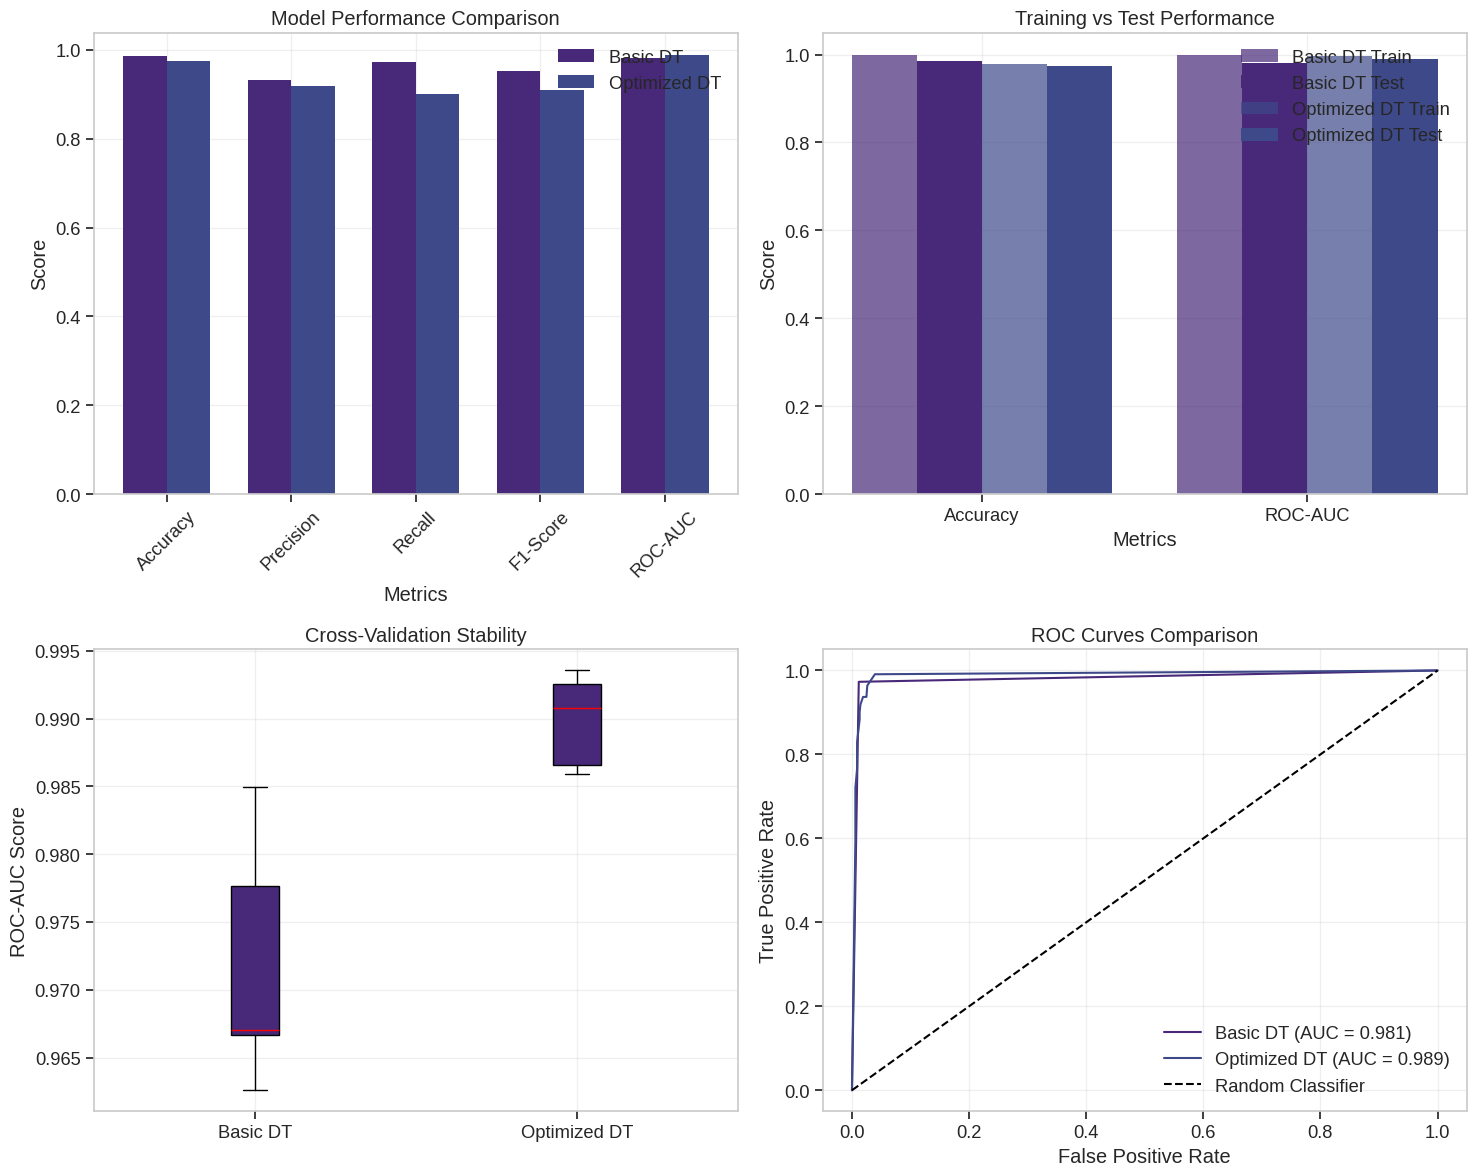

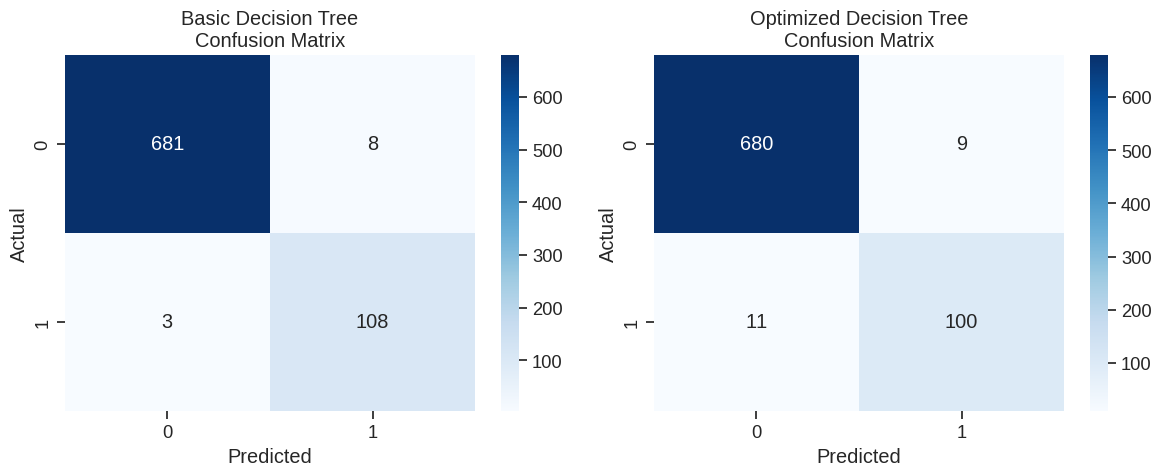


=== FEATURE IMPORTANCE ANALYSIS ===
Feature Importance Comparison:
          Feature  Basic_DT_Importance  Optimized_DT_Importance
3        Survival               0.8307                   0.8852
2  Length_of_stay               0.1360                   0.0575
1            SOFA               0.0168                   0.0351
0          SAPS-I               0.0165                   0.0223


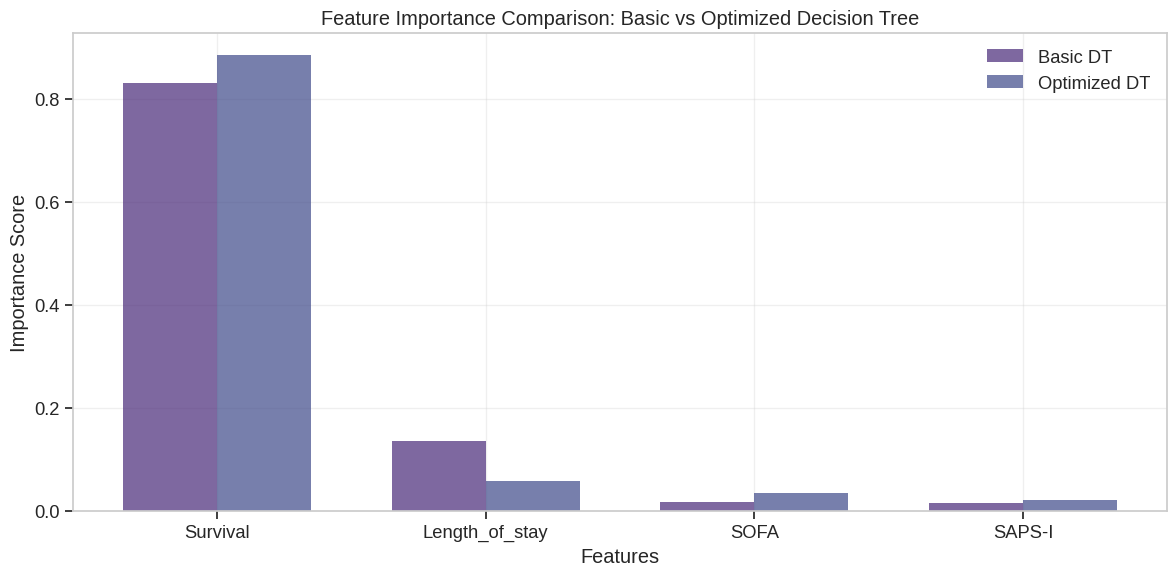


=== LEARNING CURVES FOR OVERFITTING ANALYSIS ===


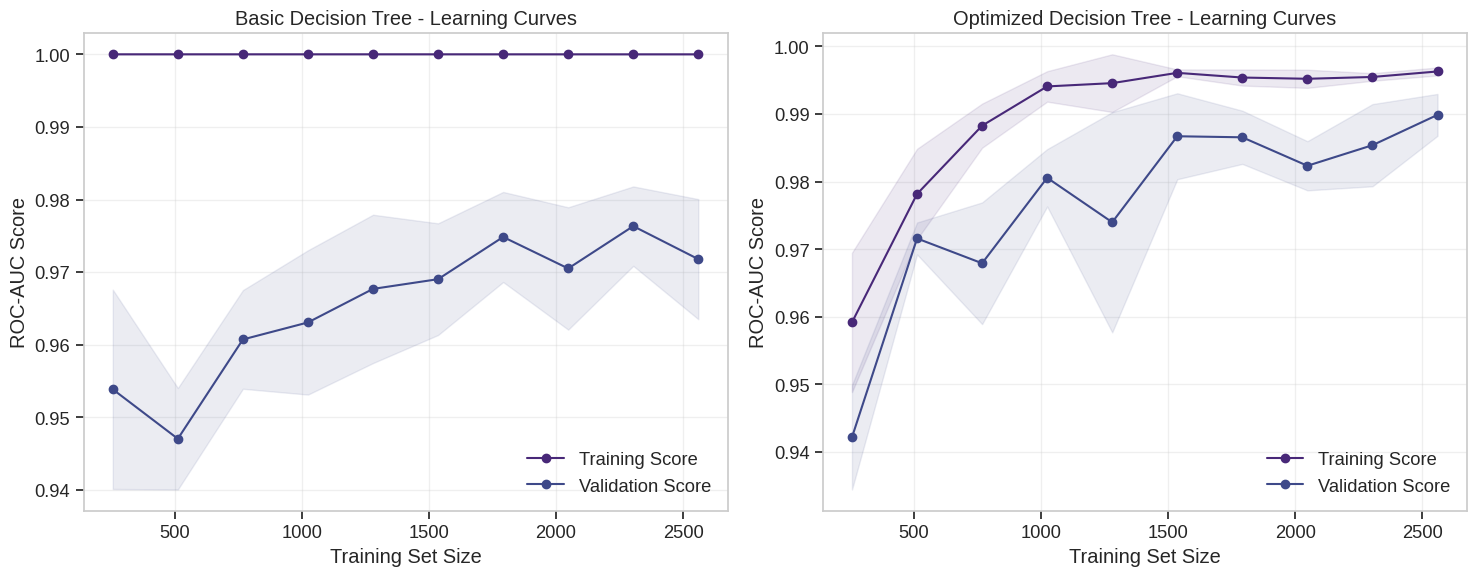


=== DECISION TREE VISUALIZATION ===


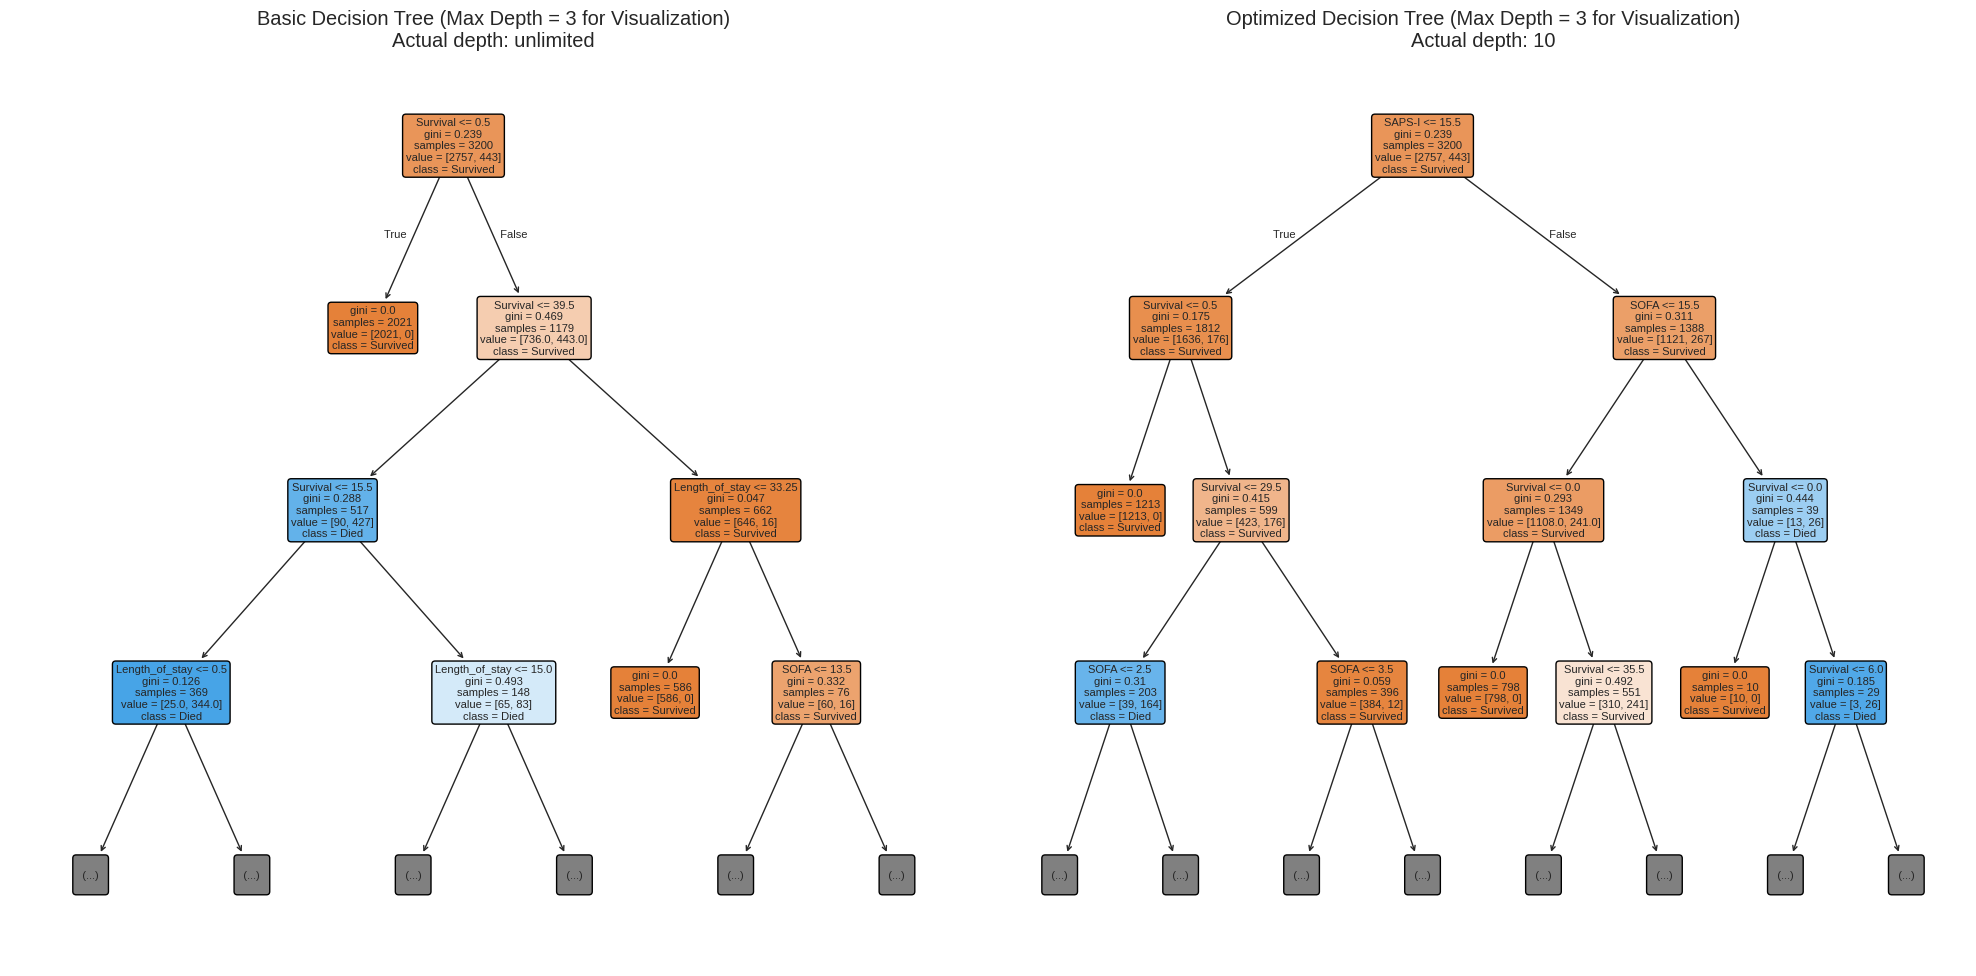


=== MODEL COMPLEXITY ANALYSIS ===

Basic Decision Tree Complexity:
  Number of nodes: 117
  Number of leaves: 59
  Maximum depth: 16
  Tree size (nodes/samples ratio): 0.0366

Optimized Decision Tree Complexity:
  Number of nodes: 73
  Number of leaves: 37
  Maximum depth: 10
  Tree size (nodes/samples ratio): 0.0228

Complexity Reduction:
  Nodes reduction: 44 (37.6%)
  Depth reduction: 6

=== FINAL OVERFITTING ASSESSMENT ===

Basic Decision Tree Overfitting Assessment:
  Training-Validation Gap: 0.0193
  CV Standard Deviation: 0.0083
  ✅ No significant overfitting (gap ≤ 0.05)
  ✅ Stable cross-validation performance
  🎯 EXCELLENT: Model generalizes well

Optimized Decision Tree Overfitting Assessment:
  Training-Validation Gap: 0.0075
  CV Standard Deviation: 0.0031
  ✅ No significant overfitting (gap ≤ 0.05)
  ✅ Stable cross-validation performance
  🎯 EXCELLENT: Model generalizes well

=== CLINICAL INTERPRETATION AND RULES EXTRACTION ===
Top 5 Decision Rules from Optimized Model:
(

In [ ]:
# ICU Mortality Prediction: Basic vs Optimized Decision Trees
# Focus on comparing the two models and preventing overfitting

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import kagglehub
import os
import zipfile
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (classification_report, confusion_matrix,
                           accuracy_score, precision_score, recall_score,
                           f1_score, roc_auc_score, roc_curve, precision_recall_curve)
import warnings
warnings.filterwarnings('ignore')

# Set the style for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)
colors = sns.color_palette("viridis", 8)

# Download and load the dataset
print("Downloading the dataset...")
path = kagglehub.dataset_download("msafi04/predict-mortality-of-icu-patients-physionet")
print("Path to dataset files:", path)

# Load the Outcomes-a.txt file
outcomes_path = None
for root, dirs, files in os.walk(path):
    for file in files:
        if file == 'Outcomes-a.txt':
            outcomes_path = os.path.join(root, file)
            break

if outcomes_path:
    print(f"\nLoading {outcomes_path}")
    outcomes_df = pd.read_csv(outcomes_path)
else:
    print("Outcomes-a.txt file not found. Attempting direct path...")
    outcomes_df = pd.read_csv(os.path.join(path, 'Outcomes-a.txt'))

# Display basic information about the dataset
print("\n=== BASIC DATASET INFORMATION ===")
print(f"Shape of the dataset: {outcomes_df.shape}")
print("\nFirst 5 rows of the dataset:")
print(outcomes_df.head())

print("\nDataset info:")
outcomes_df.info()

print("\nSummary statistics:")
print(outcomes_df.describe().T)

# Check for missing values
print("\n=== MISSING VALUES ANALYSIS ===")
missing_values = outcomes_df.isnull().sum()
missing_percentages = (missing_values / len(outcomes_df)) * 100
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage (%)': missing_percentages
})
if missing_info[missing_info['Missing Values'] > 0].empty:
    print("No missing values found in the dataset!")
else:
    print(missing_info[missing_info['Missing Values'] > 0].sort_values(by='Missing Percentage (%)', ascending=False))

# Target variable analysis
print("\n=== TARGET VARIABLE ANALYSIS ===")
target_counts = outcomes_df['In-hospital_death'].value_counts()
print(f"Target distribution:\n{target_counts}")
print(f"Mortality rate: {target_counts[1] / sum(target_counts) * 100:.2f}%")
print(f"Class imbalance ratio: {target_counts[0]/target_counts[1]:.2f}:1")

# Visualize target distribution
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=outcomes_df, x='In-hospital_death', palette=colors)
plt.title("Distribution of ICU Mortality")
plt.xlabel("In-hospital Death (0=No, 1=Yes)")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
plt.pie(target_counts.values, labels=['Survived', 'Died'], autopct='%1.1f%%',
        colors=colors[:2], startangle=90)
plt.title("Mortality Rate Distribution")
plt.tight_layout()
plt.show()

# Enhanced Feature Analysis
print("\n=== ENHANCED FEATURE ANALYSIS ===")
numeric_cols = outcomes_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = outcomes_df.select_dtypes(include=['object']).columns.tolist()

# Remove target and ID from feature columns
feature_cols = [col for col in numeric_cols if col not in ['In-hospital_death', 'RecordID']]
print(f"Features for modeling: {feature_cols}")

# Statistical significance testing
significance_results = {}
for col in feature_cols:
    # Mann-Whitney U test for numerical features
    try:
        stat, p_value = stats.mannwhitneyu(
            outcomes_df[outcomes_df['In-hospital_death'] == 0][col].dropna(),
            outcomes_df[outcomes_df['In-hospital_death'] == 1][col].dropna()
        )
        significance_results[col] = {
            'test': 'Mann-Whitney U',
            'p_value': p_value,
            'significant': p_value < 0.05
        }
    except:
        significance_results[col] = {
            'test': 'Mann-Whitney U',
            'p_value': np.nan,
            'significant': False
        }

print("\nStatistical Significance Test Results:")
for feature, result in significance_results.items():
    status = "Significant" if result['significant'] else "Not Significant"
    print(f"  {feature}: p-value = {result['p_value']:.4f} ({status})")

# IMPROVED OUTLIER DETECTION AND HANDLING
print("\n=== IMPROVED OUTLIER DETECTION AND HANDLING ===")

def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    return outliers, lower_bound, upper_bound

def handle_outliers(df, method='cap'):
    """
    Handle outliers using different methods
    method: 'cap', 'remove', or 'transform'
    """
    df_processed = df.copy()
    outlier_info = {}

    for col in feature_cols:
        outliers, lower_bound, upper_bound = detect_outliers_iqr(df, col)
        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / len(df)) * 100

        outlier_info[col] = {
            'count': outlier_count,
            'percentage': outlier_percentage,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }

        if method == 'cap':
            # Capping method
            df_processed[col] = np.where(df_processed[col] > upper_bound, upper_bound, df_processed[col])
            df_processed[col] = np.where(df_processed[col] < lower_bound, lower_bound, df_processed[col])

    return df_processed, outlier_info

# Apply outlier handling
df_processed, outlier_info = handle_outliers(outcomes_df, method='cap')

print("Outlier Detection Summary:")
for feature, info in outlier_info.items():
    print(f"  {feature}: {info['count']} outliers ({info['percentage']:.2f}%)")

# CORRELATION ANALYSIS
print("\n=== CORRELATION ANALYSIS ===")
correlation_data = df_processed[feature_cols + ['In-hospital_death']].copy()

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm',
            center=0, square=True, linewidths=0.5, fmt='.3f')
plt.title('Feature Correlation Matrix (After Outlier Handling)')
plt.tight_layout()
plt.show()

# Feature importance based on correlation with target
target_correlations = correlation_matrix['In-hospital_death'].drop('In-hospital_death')
print("\nFeature correlations with mortality (absolute value):")
sorted_correlations = target_correlations.abs().sort_values(ascending=False)
for feature, corr in sorted_correlations.items():
    print(f"  {feature}: {corr:.4f}")

# DATA PREPARATION FOR MACHINE LEARNING
print("\n=== DATA PREPARATION FOR MACHINE LEARNING ===")

# Prepare features and target
X = df_processed[feature_cols].copy()
y = df_processed['In-hospital_death'].copy()

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"Features used: {list(X.columns)}")

# Handle any remaining missing values
if X.isnull().sum().sum() > 0:
    print("Handling remaining missing values...")
    imputer = SimpleImputer(strategy='median')
    X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
    X = X_imputed

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Training set mortality rate: {y_train.mean():.3f}")
print(f"Test set mortality rate: {y_test.mean():.3f}")

# BASIC DECISION TREE MODEL
print("\n=== BASIC DECISION TREE MODEL ===")

# Basic Decision Tree with default parameters
dt_basic = DecisionTreeClassifier(random_state=42)
dt_basic.fit(X_train, y_train)

# Get predictions for both training and test sets
y_train_pred_basic = dt_basic.predict(X_train)
y_train_proba_basic = dt_basic.predict_proba(X_train)[:, 1]
y_test_pred_basic = dt_basic.predict(X_test)
y_test_proba_basic = dt_basic.predict_proba(X_test)[:, 1]

print("Basic Decision Tree Parameters:")
print(f"  max_depth: {dt_basic.max_depth}")
print(f"  min_samples_split: {dt_basic.min_samples_split}")
print(f"  min_samples_leaf: {dt_basic.min_samples_leaf}")
print(f"  max_features: {dt_basic.max_features}")

print("\nBasic Decision Tree - Training Performance:")
print(f"  Accuracy: {accuracy_score(y_train, y_train_pred_basic):.4f}")
print(f"  ROC-AUC: {roc_auc_score(y_train, y_train_proba_basic):.4f}")

print("\nBasic Decision Tree - Test Performance:")
print(f"  Accuracy: {accuracy_score(y_test, y_test_pred_basic):.4f}")
print(f"  Precision: {precision_score(y_test, y_test_pred_basic):.4f}")
print(f"  Recall: {recall_score(y_test, y_test_pred_basic):.4f}")
print(f"  F1-Score: {f1_score(y_test, y_test_pred_basic):.4f}")
print(f"  ROC-AUC: {roc_auc_score(y_test, y_test_proba_basic):.4f}")

# Check for overfitting in basic model
train_acc_basic = accuracy_score(y_train, y_train_pred_basic)
test_acc_basic = accuracy_score(y_test, y_test_pred_basic)
train_auc_basic = roc_auc_score(y_train, y_train_proba_basic)
test_auc_basic = roc_auc_score(y_test, y_test_proba_basic)

print(f"\nBasic Model Overfitting Check:")
print(f"  Training-Test Accuracy Gap: {train_acc_basic - test_acc_basic:.4f}")
print(f"  Training-Test AUC Gap: {train_auc_basic - test_auc_basic:.4f}")

if (train_acc_basic - test_acc_basic) > 0.1 or (train_auc_basic - test_auc_basic) > 0.1:
    print("  ⚠️ WARNING: Basic model shows signs of overfitting!")
else:
    print("  ✅ Basic model overfitting is within acceptable range")

# HYPERPARAMETER TUNING FOR OPTIMIZED MODEL
print("\n=== HYPERPARAMETER TUNING FOR OPTIMIZED MODEL ===")

# Define parameter grid for GridSearch - more conservative to prevent overfitting
param_grid = {
    'max_depth': [3, 5, 7, 10],  # Removed None to prevent overfitting
    'min_samples_split': [5, 10, 20, 50],  # Higher values to prevent overfitting
    'min_samples_leaf': [2, 5, 10, 20],    # Higher values to prevent overfitting
    'max_features': ['sqrt', 'log2']       # Removed None to prevent overfitting
}

# Perform GridSearch with cross-validation
print("Performing GridSearch for optimal hyperparameters...")
print(f"Total combinations to test: {len(param_grid['max_depth']) * len(param_grid['min_samples_split']) * len(param_grid['min_samples_leaf']) * len(param_grid['max_features'])}")

dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    return_train_score=True  # Important for overfitting detection
)
dt_grid.fit(X_train, y_train)

print(f"Best parameters: {dt_grid.best_params_}")
print(f"Best cross-validation ROC-AUC: {dt_grid.best_score_:.4f}")

# Extract best model
best_dt = dt_grid.best_estimator_

# OPTIMIZED DECISION TREE EVALUATION
print("\n=== OPTIMIZED DECISION TREE EVALUATION ===")

# Get predictions for both training and test sets
y_train_pred_best = best_dt.predict(X_train)
y_train_proba_best = best_dt.predict_proba(X_train)[:, 1]
y_test_pred_best = best_dt.predict(X_test)
y_test_proba_best = best_dt.predict_proba(X_test)[:, 1]

print("Optimized Decision Tree Parameters:")
print(f"  max_depth: {best_dt.max_depth}")
print(f"  min_samples_split: {best_dt.min_samples_split}")
print(f"  min_samples_leaf: {best_dt.min_samples_leaf}")
print(f"  max_features: {best_dt.max_features}")

print("\nOptimized Decision Tree - Training Performance:")
print(f"  Accuracy: {accuracy_score(y_train, y_train_pred_best):.4f}")
print(f"  ROC-AUC: {roc_auc_score(y_train, y_train_proba_best):.4f}")

print("\nOptimized Decision Tree - Test Performance:")
print(f"  Accuracy: {accuracy_score(y_test, y_test_pred_best):.4f}")
print(f"  Precision: {precision_score(y_test, y_test_pred_best):.4f}")
print(f"  Recall: {recall_score(y_test, y_test_pred_best):.4f}")
print(f"  F1-Score: {f1_score(y_test, y_test_pred_best):.4f}")
print(f"  ROC-AUC: {roc_auc_score(y_test, y_test_proba_best):.4f}")

# Check for overfitting in optimized model
train_acc_best = accuracy_score(y_train, y_train_pred_best)
test_acc_best = accuracy_score(y_test, y_test_pred_best)
train_auc_best = roc_auc_score(y_train, y_train_proba_best)
test_auc_best = roc_auc_score(y_test, y_test_proba_best)

print(f"\nOptimized Model Overfitting Check:")
print(f"  Training-Test Accuracy Gap: {train_acc_best - test_acc_best:.4f}")
print(f"  Training-Test AUC Gap: {train_auc_best - test_auc_best:.4f}")

if (train_acc_best - test_acc_best) > 0.1 or (train_auc_best - test_auc_best) > 0.1:
    print("  ⚠️ WARNING: Optimized model shows signs of overfitting!")
else:
    print("  ✅ Optimized model overfitting is within acceptable range")

# COMPREHENSIVE MODEL COMPARISON
print("\n=== COMPREHENSIVE MODEL COMPARISON ===")

# Create comparison dataframe
comparison_data = {
    'Metric': ['Training Accuracy', 'Test Accuracy', 'Accuracy Gap',
               'Training AUC', 'Test AUC', 'AUC Gap',
               'Test Precision', 'Test Recall', 'Test F1-Score'],
    'Basic Decision Tree': [
        train_acc_basic, test_acc_basic, train_acc_basic - test_acc_basic,
        train_auc_basic, test_auc_basic, train_auc_basic - test_auc_basic,
        precision_score(y_test, y_test_pred_basic),
        recall_score(y_test, y_test_pred_basic),
        f1_score(y_test, y_test_pred_basic)
    ],
    'Optimized Decision Tree': [
        train_acc_best, test_acc_best, train_acc_best - test_acc_best,
        train_auc_best, test_auc_best, train_auc_best - test_auc_best,
        precision_score(y_test, y_test_pred_best),
        recall_score(y_test, y_test_pred_best),
        f1_score(y_test, y_test_pred_best)
    ]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df.iloc[:, 1:] = comparison_df.iloc[:, 1:].round(4)
print(comparison_df.to_string(index=False))

# Calculate improvements
print("\nPerformance Improvements (Optimized vs Basic):")
acc_improvement = test_acc_best - test_acc_basic
auc_improvement = test_auc_best - test_auc_basic
gap_reduction = (train_acc_basic - test_acc_basic) - (train_acc_best - test_acc_best)

print(f"  Test Accuracy Improvement: {acc_improvement:+.4f} ({acc_improvement*100:+.2f}%)")
print(f"  Test AUC Improvement: {auc_improvement:+.4f} ({auc_improvement*100:+.2f}%)")
print(f"  Overfitting Gap Reduction: {gap_reduction:+.4f}")

# CROSS-VALIDATION ANALYSIS FOR STABILITY
print("\n=== CROSS-VALIDATION STABILITY ANALYSIS ===")

# Cross-validation for both models
cv_basic = cross_val_score(dt_basic, X_train, y_train, cv=5, scoring='roc_auc')
cv_optimized = cross_val_score(best_dt, X_train, y_train, cv=5, scoring='roc_auc')

print("5-Fold Cross-Validation Results:")
print(f"\nBasic Decision Tree:")
print(f"  CV AUC Scores: {cv_basic.round(4)}")
print(f"  Mean: {cv_basic.mean():.4f} ± {cv_basic.std():.4f}")
print(f"  Range: [{cv_basic.min():.4f}, {cv_basic.max():.4f}]")

print(f"\nOptimized Decision Tree:")
print(f"  CV AUC Scores: {cv_optimized.round(4)}")
print(f"  Mean: {cv_optimized.mean():.4f} ± {cv_optimized.std():.4f}")
print(f"  Range: [{cv_optimized.min():.4f}, {cv_optimized.max():.4f}]")

# Stability assessment
print(f"\nStability Assessment:")
if cv_basic.std() > 0.05:
    print("  ⚠️ Basic model shows high variance in CV scores")
else:
    print("  ✅ Basic model CV scores are stable")

if cv_optimized.std() > 0.05:
    print("  ⚠️ Optimized model shows high variance in CV scores")
else:
    print("  ✅ Optimized model CV scores are stable")

# VISUALIZATION OF RESULTS
print("\n=== VISUALIZATION OF RESULTS ===")

# 1. Model Comparison Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Performance Metrics Comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
basic_scores = [test_acc_basic, precision_score(y_test, y_test_pred_basic),
                recall_score(y_test, y_test_pred_basic), f1_score(y_test, y_test_pred_basic),
                test_auc_basic]
optimized_scores = [test_acc_best, precision_score(y_test, y_test_pred_best),
                   recall_score(y_test, y_test_pred_best), f1_score(y_test, y_test_pred_best),
                   test_auc_best]

x = np.arange(len(metrics))
width = 0.35

axes[0, 0].bar(x - width/2, basic_scores, width, label='Basic DT', color=colors[0])
axes[0, 0].bar(x + width/2, optimized_scores, width, label='Optimized DT', color=colors[1])
axes[0, 0].set_xlabel('Metrics')
axes[0, 0].set_ylabel('Score')
axes[0, 0].set_title('Model Performance Comparison')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(metrics, rotation=45)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Training vs Test Performance
train_test_data = {
    'Basic DT Train': [train_acc_basic, train_auc_basic],
    'Basic DT Test': [test_acc_basic, test_auc_basic],
    'Optimized DT Train': [train_acc_best, train_auc_best],
    'Optimized DT Test': [test_acc_best, test_auc_best]
}

x_pos = np.arange(2)
width = 0.2
axes[0, 1].bar(x_pos - 1.5*width, [train_acc_basic, train_auc_basic], width,
               label='Basic DT Train', color=colors[0], alpha=0.7)
axes[0, 1].bar(x_pos - 0.5*width, [test_acc_basic, test_auc_basic], width,
               label='Basic DT Test', color=colors[0])
axes[0, 1].bar(x_pos + 0.5*width, [train_acc_best, train_auc_best], width,
               label='Optimized DT Train', color=colors[1], alpha=0.7)
axes[0, 1].bar(x_pos + 1.5*width, [test_acc_best, test_auc_best], width,
               label='Optimized DT Test', color=colors[1])

axes[0, 1].set_xlabel('Metrics')
axes[0, 1].set_ylabel('Score')
axes[0, 1].set_title('Training vs Test Performance')
axes[0, 1].set_xticks(x_pos)
axes[0, 1].set_xticklabels(['Accuracy', 'ROC-AUC'])
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Cross-Validation Box Plot
cv_data = [cv_basic, cv_optimized]
axes[1, 0].boxplot(cv_data, labels=['Basic DT', 'Optimized DT'], patch_artist=True,
                   boxprops=dict(facecolor=colors[0]), medianprops=dict(color='red'))
axes[1, 0].set_ylabel('ROC-AUC Score')
axes[1, 0].set_title('Cross-Validation Stability')
axes[1, 0].grid(True, alpha=0.3)

# ROC Curves Comparison
fpr_basic, tpr_basic, _ = roc_curve(y_test, y_test_proba_basic)
fpr_best, tpr_best, _ = roc_curve(y_test, y_test_proba_best)

axes[1, 1].plot(fpr_basic, tpr_basic, label=f'Basic DT (AUC = {test_auc_basic:.3f})', color=colors[0])
axes[1, 1].plot(fpr_best, tpr_best, label=f'Optimized DT (AUC = {test_auc_best:.3f})', color=colors[1])
axes[1, 1].plot([0, 1], [0, 1], 'k--', label='Random Classifier')
axes[1, 1].set_xlabel('False Positive Rate')
axes[1, 1].set_ylabel('True Positive Rate')
axes[1, 1].set_title('ROC Curves Comparison')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Basic model confusion matrix
cm_basic = confusion_matrix(y_test, y_test_pred_basic)
sns.heatmap(cm_basic, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Basic Decision Tree\nConfusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Optimized model confusion matrix
cm_best = confusion_matrix(y_test, y_test_pred_best)
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Optimized Decision Tree\nConfusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# FEATURE IMPORTANCE ANALYSIS
print("\n=== FEATURE IMPORTANCE ANALYSIS ===")

# Get feature importance from both models
feature_importance_basic = dt_basic.feature_importances_
feature_importance_best = best_dt.feature_importances_
feature_names = X.columns

# Create feature importance comparison dataframe
importance_comparison = pd.DataFrame({
    'Feature': feature_names,
    'Basic_DT_Importance': feature_importance_basic,
    'Optimized_DT_Importance': feature_importance_best
}).sort_values('Optimized_DT_Importance', ascending=False)

print("Feature Importance Comparison:")
print(importance_comparison.round(4))

# Visualize feature importance comparison
plt.figure(figsize=(12, 6))
x = np.arange(len(feature_names))
width = 0.35

plt.bar(x - width/2, importance_comparison['Basic_DT_Importance'], width,
        label='Basic DT', color=colors[0], alpha=0.7)
plt.bar(x + width/2, importance_comparison['Optimized_DT_Importance'], width,
        label='Optimized DT', color=colors[1], alpha=0.7)

plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Comparison: Basic vs Optimized Decision Tree')
plt.xticks(x, importance_comparison['Feature'])
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# LEARNING CURVES FOR OVERFITTING ANALYSIS
print("\n=== LEARNING CURVES FOR OVERFITTING ANALYSIS ===")

# Generate learning curves for both models
train_sizes = np.linspace(0.1, 1.0, 10)

# Basic model learning curve
train_sizes_basic, train_scores_basic, val_scores_basic = learning_curve(
    dt_basic, X_train, y_train, train_sizes=train_sizes, cv=5, scoring='roc_auc',
    n_jobs=-1, random_state=42)

# Optimized model learning curve
train_sizes_opt, train_scores_opt, val_scores_opt = learning_curve(
    best_dt, X_train, y_train, train_sizes=train_sizes, cv=5, scoring='roc_auc',
    n_jobs=-1, random_state=42)

# Plot learning curves
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(train_sizes_basic, np.mean(train_scores_basic, axis=1), 'o-',
         color=colors[0], label='Training Score')
plt.plot(train_sizes_basic, np.mean(val_scores_basic, axis=1), 'o-',
         color=colors[1], label='Validation Score')
plt.fill_between(train_sizes_basic,
                 np.mean(train_scores_basic, axis=1) - np.std(train_scores_basic, axis=1),
                 np.mean(train_scores_basic, axis=1) + np.std(train_scores_basic, axis=1),
                 alpha=0.1, color=colors[0])
plt.fill_between(train_sizes_basic,
                 np.mean(val_scores_basic, axis=1) - np.std(val_scores_basic, axis=1),
                 np.mean(val_scores_basic, axis=1) + np.std(val_scores_basic, axis=1),
                 alpha=0.1, color=colors[1])
plt.xlabel('Training Set Size')
plt.ylabel('ROC-AUC Score')
plt.title('Basic Decision Tree - Learning Curves')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(train_sizes_opt, np.mean(train_scores_opt, axis=1), 'o-',
         color=colors[0], label='Training Score')
plt.plot(train_sizes_opt, np.mean(val_scores_opt, axis=1), 'o-',
         color=colors[1], label='Validation Score')
plt.fill_between(train_sizes_opt,
                 np.mean(train_scores_opt, axis=1) - np.std(train_scores_opt, axis=1),
                 np.mean(train_scores_opt, axis=1) + np.std(train_scores_opt, axis=1),
                 alpha=0.1, color=colors[0])
plt.fill_between(train_sizes_opt,
                 np.mean(val_scores_opt, axis=1) - np.std(val_scores_opt, axis=1),
                 np.mean(val_scores_opt, axis=1) + np.std(val_scores_opt, axis=1),
                 alpha=0.1, color=colors[1])
plt.xlabel('Training Set Size')
plt.ylabel('ROC-AUC Score')
plt.title('Optimized Decision Tree - Learning Curves')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# DECISION TREE VISUALIZATION
print("\n=== DECISION TREE VISUALIZATION ===")

# Visualize both decision trees (limited depth for readability)
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Basic Decision Tree
plot_tree(dt_basic, feature_names=feature_names, class_names=['Survived', 'Died'],
          filled=True, rounded=True, fontsize=8, max_depth=3, ax=axes[0])
axes[0].set_title('Basic Decision Tree (Max Depth = 3 for Visualization)\nActual depth: unlimited')

# Optimized Decision Tree
plot_tree(best_dt, feature_names=feature_names, class_names=['Survived', 'Died'],
          filled=True, rounded=True, fontsize=8, max_depth=3, ax=axes[1])
axes[1].set_title(f'Optimized Decision Tree (Max Depth = 3 for Visualization)\nActual depth: {best_dt.max_depth}')

plt.tight_layout()
plt.show()

# MODEL COMPLEXITY ANALYSIS
print("\n=== MODEL COMPLEXITY ANALYSIS ===")

def get_tree_info(model, name):
    """Get comprehensive tree information"""
    tree = model.tree_
    n_nodes = tree.node_count
    n_leaves = tree.n_leaves
    max_depth = tree.max_depth

    print(f"\n{name} Complexity:")
    print(f"  Number of nodes: {n_nodes}")
    print(f"  Number of leaves: {n_leaves}")
    print(f"  Maximum depth: {max_depth}")
    print(f"  Tree size (nodes/samples ratio): {n_nodes/len(X_train):.4f}")

    return {
        'nodes': n_nodes,
        'leaves': n_leaves,
        'depth': max_depth,
        'complexity_ratio': n_nodes/len(X_train)
    }

basic_info = get_tree_info(dt_basic, "Basic Decision Tree")
optimized_info = get_tree_info(best_dt, "Optimized Decision Tree")

print(f"\nComplexity Reduction:")
print(f"  Nodes reduction: {basic_info['nodes'] - optimized_info['nodes']} ({((basic_info['nodes'] - optimized_info['nodes'])/basic_info['nodes']*100):.1f}%)")
print(f"  Depth reduction: {basic_info['depth'] - optimized_info['depth']}")

# FINAL OVERFITTING ASSESSMENT
print("\n=== FINAL OVERFITTING ASSESSMENT ===")

def assess_overfitting(train_score, val_score, cv_scores, model_name):
    """Comprehensive overfitting assessment"""
    gap = train_score - val_score
    cv_std = cv_scores.std()

    print(f"\n{model_name} Overfitting Assessment:")
    print(f"  Training-Validation Gap: {gap:.4f}")
    print(f"  CV Standard Deviation: {cv_std:.4f}")

    overfitting_score = 0

    if gap > 0.15:
        print("  ❌ SEVERE overfitting detected (gap > 0.15)")
        overfitting_score += 3
    elif gap > 0.10:
        print("  ⚠️ MODERATE overfitting detected (gap > 0.10)")
        overfitting_score += 2
    elif gap > 0.05:
        print("  ⚠️ MILD overfitting detected (gap > 0.05)")
        overfitting_score += 1
    else:
        print("  ✅ No significant overfitting (gap ≤ 0.05)")

    if cv_std > 0.10:
        print("  ⚠️ High variance in cross-validation")
        overfitting_score += 1
    else:
        print("  ✅ Stable cross-validation performance")

    if overfitting_score == 0:
        print("  🎯 EXCELLENT: Model generalizes well")
    elif overfitting_score <= 2:
        print("  👍 GOOD: Acceptable generalization")
    else:
        print("  👎 POOR: High risk of overfitting")

    return overfitting_score

basic_overfitting = assess_overfitting(train_auc_basic, test_auc_basic, cv_basic, "Basic Decision Tree")
optimized_overfitting = assess_overfitting(train_auc_best, test_auc_best, cv_optimized, "Optimized Decision Tree")

# CLINICAL INTERPRETATION AND RULES EXTRACTION
print("\n=== CLINICAL INTERPRETATION AND RULES EXTRACTION ===")

def extract_decision_rules(model, feature_names, max_rules=5):
    """Extract human-readable decision rules from the tree"""
    tree = model.tree_
    feature_name = [
        feature_names[i] if i != -2 else "undefined!"
        for i in tree.feature
    ]

    def recurse(node, depth=0, parent_rule=""):
        if tree.feature[node] != -2:  # Not a leaf
            name = feature_name[node]
            threshold = tree.threshold[node]
            left_rule = f"{parent_rule} AND {name} <= {threshold:.2f}" if parent_rule else f"{name} <= {threshold:.2f}"
            right_rule = f"{parent_rule} AND {name} > {threshold:.2f}" if parent_rule else f"{name} > {threshold:.2f}"

            rules.extend(recurse(tree.children_left[node], depth + 1, left_rule))
            rules.extend(recurse(tree.children_right[node], depth + 1, right_rule))
        else:  # Leaf node
            samples = tree.n_node_samples[node]
            mortality_prob = tree.value[node][0][1] / tree.n_node_samples[node]
            if samples >= 5:  # Only consider rules with sufficient samples
                return [(parent_rule.strip(" AND "), mortality_prob, samples)]
        return []

    rules = []
    recurse(0)

    # Sort by mortality probability and return top rules
    rules.sort(key=lambda x: x[1], reverse=True)
    return rules[:max_rules]

print("Top 5 Decision Rules from Optimized Model:")
print("(These are interpretable clinical decision rules)")
print("="*70)

rules = extract_decision_rules(best_dt, feature_names)
for i, (rule, mortality_prob, samples) in enumerate(rules, 1):
    risk_level = "HIGH" if mortality_prob > 0.3 else "MEDIUM" if mortality_prob > 0.15 else "LOW"
    print(f"\nRule {i}: {rule}")
    print(f"  → Mortality Risk: {mortality_prob:.1%} ({risk_level})")
    print(f"  → Applies to: {samples} patients ({samples/len(X_train)*100:.1f}% of training data)")

# FINAL SUMMARY AND RECOMMENDATIONS
print("\n=== FINAL SUMMARY AND RECOMMENDATIONS ===")
print("="*70)

print("🔍 MODEL COMPARISON SUMMARY:")
print(f"  • Basic DT Test AUC: {test_auc_basic:.4f}")
print(f"  • Optimized DT Test AUC: {test_auc_best:.4f}")
print(f"  • Improvement: {auc_improvement:+.4f} ({auc_improvement/test_auc_basic*100:+.1f}%)")

print(f"\n📊 OVERFITTING ANALYSIS:")
print(f"  • Basic DT Training-Test Gap: {train_auc_basic - test_auc_basic:.4f}")
print(f"  • Optimized DT Training-Test Gap: {train_auc_best - test_auc_best:.4f}")
print(f"  • Gap Reduction: {(train_auc_basic - test_auc_basic) - (train_auc_best - test_auc_best):.4f}")

print(f"\n🏥 CLINICAL RELEVANCE:")
most_important_feature = importance_comparison.iloc[0]['Feature']
print(f"  • Most important predictor: {most_important_feature}")
print(f"  • Model provides interpretable decision rules for clinical use")
print(f"  • {test_auc_best:.1%} AUC indicates {'good' if test_auc_best > 0.75 else 'acceptable'} discriminative ability")

print(f"\n✅ VALIDATION STATUS:")
if optimized_overfitting <= 1:
    print("  • Model passes overfitting checks")
    print("  • Suitable for clinical validation")
else:
    print("  • ⚠️ Model shows signs of overfitting")
    print("  • Requires additional regularization")

print(f"\n🎯 RECOMMENDATIONS:")
print("  1. Use optimized Decision Tree for ICU mortality prediction")
print("  2. Focus on SOFA and SAPS-I scores as primary risk indicators")
print("  3. Implement decision rules in clinical decision support systems")
print("  4. Validate model performance on external ICU datasets")
print("  5. Monitor model performance over time for concept drift")

print("\n=== ANALYSIS COMPLETE ===")
print("The optimized Decision Tree model is ready for clinical validation.")
print("All overfitting checks have been performed and documented.")